# Environment Setup

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import plotly.express as px # charts plotting
import plotly.graph_objects as go # more customized plotting

In [2]:
retail = pd.read_csv('/work/online_retail_II.csv')

In [3]:
# Use the head() function to check the first few rows of the data:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# Use the info() function to get information about the data types of each column and whether there are any missing values:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Observations: 

-  'InvoiceDate' column contains datetime information, but is currently in the 'object' data type. This column would be converted to a datetime data type

- 'Description' and 'Customer ID' columns have some missing values (non-null count is less than the total number of rows), so I will drop rows with missing values 

-  'Customer ID' column is of 'float64' data type, so I will convert the column into 'int64'

- Creating a new column called 'TotalPaid', to calculate the total value of each transaction by multiplying the price and quantity columns.

In [5]:
retail['InvoiceDate_DT'] = pd.to_datetime(retail['InvoiceDate'])
retail = retail[retail['Customer ID'].notna()]
retail['Customer ID'] = retail['Customer ID'].astype(np.int64)
retail['TotalPaid'] = retail['Quantity']*retail['Price']
retail = retail.sort_values('InvoiceDate_DT')

In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Invoice         824364 non-null  object        
 1   StockCode       824364 non-null  object        
 2   Description     824364 non-null  object        
 3   Quantity        824364 non-null  int64         
 4   InvoiceDate     824364 non-null  object        
 5   Price           824364 non-null  float64       
 6   Customer ID     824364 non-null  int64         
 7   Country         824364 non-null  object        
 8   InvoiceDate_DT  824364 non-null  datetime64[ns]
 9   TotalPaid       824364 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 69.2+ MB


#  Exploratory Data Analysis 

## Most and Least Expensive Product

In the first section, I will explore the dataset and find out the products with the highest and lowest prices.

In [7]:
# The most expensive products
retail[retail['Price'] == retail['Price'].max()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,TotalPaid
748142,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098,United Kingdom,2011-06-10 15:31:00,-38970.0


Based on the output, it appears that the maximum price in the 'Price' column is 38970.0, and this price corresponds to a product with the Invoice code 'C556445'. However, there seems to be an issue with this transaction, as the quantity is listed as -1, and the 'Total' column reflects a negative value of -38970.0, look like the customer returned a product price or did not pay for it yet. Therefore, I'm curious to see what is the highest priced items that have been paid (quantity > 0)

In [8]:
positive_quant = retail.query('Quantity>0')
positive_quant[positive_quant['Price'] == positive_quant['Price'].max()]
     

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,TotalPaid
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.5,12918,United Kingdom,2010-03-23 15:22:00,10953.5


We can see that the most expensive item is £38,970 while the most high-priced product with positive quantity is £10,953

In [9]:
# The least expensive product
retail[retail['Price'] == retail['Price'].min()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,TotalPaid
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126,United Kingdom,2009-12-02 13:34:00,0.0
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658,United Kingdom,2009-12-03 11:19:00,0.0
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231,United Kingdom,2009-12-07 16:38:00,0.0
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108,United Kingdom,2009-12-08 15:25:00,0.0
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108,United Kingdom,2009-12-08 15:25:00,0.0
...,...,...,...,...,...,...,...,...,...,...
1004540,577129,22464,HANGING METAL HEART LANTERN,4,2011-11-17 19:52:00,0.0,15602,United Kingdom,2011-11-17 19:52:00,0.0
1005014,577168,M,Manual,1,2011-11-18 10:42:00,0.0,12603,Germany,2011-11-18 10:42:00,0.0
1006110,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-11-18 13:23:00,0.0,12444,Norway,2011-11-18 13:23:00,0.0
1011446,577696,M,Manual,1,2011-11-21 11:57:00,0.0,16406,United Kingdom,2011-11-21 11:57:00,0.0


Note:  There are 71 unique products with a price of 0 Pound. These products may have been part of 1-for-1 deals and given for free to customers. I will temporarily ignore these values to find the next lowest priced items

In [10]:
retail_nonzero_price = retail[retail['Price'] > 0]
retail_nonzero_price [retail_nonzero_price ['Price'] == retail_nonzero_price['Price'].min()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,TotalPaid
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705,United Kingdom,2010-01-19 17:04:00,0.001
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583,United Kingdom,2010-01-29 13:53:00,0.001
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350,United Kingdom,2010-02-01 15:38:00,0.001
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408,United Kingdom,2010-02-03 11:58:00,0.001
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408,United Kingdom,2010-02-15 10:47:00,0.001
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182,United Kingdom,2010-02-21 12:03:00,0.001
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.001,13765,United Kingdom,2010-02-24 13:46:00,0.001
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459,United Kingdom,2010-02-26 13:26:00,0.001
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857,United Kingdom,2010-03-15 11:00:00,0.001
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671,Germany,2010-04-12 16:30:00,0.001


Note: The two cheapest products in the dataset are 'Pads To Match All Cushions' and 'Bank Charges', both priced at 0.001 Pounds. My hypothesis is these items were sold at a minimal price, potentially as add-ons or accessories to more expensive products.

## Top 10 Highest Spending Customer Analysis

In this section, I will analyze the total amount paid by individual customers and identify the top 10 highest-spending customers

In [11]:
retail_customers=retail.groupby(['Customer ID', 'Country'], as_index=False)['TotalPaid'].agg('sum')
top_customers = retail_customers.sort_values('TotalPaid', ascending=False).head(10)
top_customers

,Customer ID,Country,TotalPaid
5769,18102,United Kingdom,598215.22
2313,14646,Netherlands,523342.07
1823,14156,EIRE,296564.69
2578,14911,EIRE,270248.53
5117,17450,United Kingdom,233579.39
1361,13694,United Kingdom,190825.52
5178,17511,United Kingdom,171885.98
72,12415,Australia,143269.29
4351,16684,United Kingdom,141502.25
2728,15061,United Kingdom,136391.48


In [12]:
# Top 10 Customers
fig = go.Figure(data=[
    go.Bar(x=top_customers['Customer ID'].astype(str),
           y=top_customers['TotalPaid'],
           hovertext=top_customers['Country'], marker={'color': top_customers['TotalPaid'],'colorscale':'Blues'})
    ])

fig.update_layout(title='Top 10 Highest Paying Customers',
                  title_x=0.5,
                  xaxis_title= 'Customer ID',
                  yaxis_title= 'Total Paid (in Pounds)', plot_bgcolor='white')                  

fig.show()

In [13]:
# Customers with Min Purchases Amount
bottom_customers = retail_customers.sort_values('TotalPaid', ascending=True).head(10)
bottom_customers

,Customer ID,Country,TotalPaid
5066,17399,United Kingdom,-25111.09
585,12918,United Kingdom,-10953.50
3516,15849,United Kingdom,-5876.34
3427,15760,Norway,-5795.87
4648,16981,United Kingdom,-4620.86
3818,16151,United Kingdom,-4217.59
1730,14063,United Kingdom,-3767.20
5690,18023,United Kingdom,-3248.86
4680,17013,United Kingdom,-3224.76
2869,15202,United Kingdom,-2570.18


I assume these customers  have not paid yet.

In [14]:
# Bottom 10 Customers
fig = go.Figure(data=[
    go.Bar(x=bottom_customers['Customer ID'].astype(str),
           y=bottom_customers['TotalPaid'],
           hovertext=top_customers['Country'], marker={'color': bottom_customers['TotalPaid'],'colorscale':'Blues_r'})
    ])

fig.update_layout(title='Top 10 Customers with Pending Total Paid',
                  title_x=0.5,
                  xaxis_title= 'Customer ID',
                  yaxis_title= 'Total Paid (in Pounds)', plot_bgcolor='white')                  

fig.show()

Conclusion: 

- From the top 10 highest paying customers, we observe that the majority of them come from English-speaking countries such as the United Kingdom, Ireland, and Australia, as well as the Netherlands. These countries may be the main markets for the E-commerce company. Customer ID 18102 from the UK has made the largest purchase of almost 599k Pounds.

- On the other hand, from the bottom 10 customers, we see that all customers are from the UK, and they still owe money for their purchases. Customer ID 17399 from the UK still owed around 25k Pounds. We can also see a similar pattern to the top customers, with the UK, Netherlands, Ireland, and Australia being among the top countries with pending total pay.

## Countries Analysis with Total Paid Amount

I will identify the top 10 markets for our online business based on customer spending. Additionally, I will analyze the bottom 10 to identify any opportunities for sales expansion.

In [15]:
retail_countries = retail.groupby('Country', as_index=False)['TotalPaid'].agg('sum')
retail_countries

,Country,TotalPaid
0,Australia,1.671291e+05
1,Austria,2.317760e+04
2,Bahrain,1.354370e+03
3,Belgium,6.357449e+04
4,Brazil,1.411870e+03
5,Canada,4.883040e+03
6,Channel Islands,4.145361e+04
7,Cyprus,2.416274e+04
8,Czech Republic,7.077200e+02
9,Denmark,6.574109e+04


In [16]:
retail_countries_top_10 = retail_countries.sort_values(by='TotalPaid', ascending=False).head(10)
retail_countries_top_10

,Country,TotalPaid
38,United Kingdom,1.380642e+07
10,EIRE,5.785016e+05
24,Netherlands,5.485250e+05
14,Germany,4.179886e+05
13,France,3.265047e+05
0,Australia,1.671291e+05
34,Switzerland,9.908281e+04
32,Spain,9.185948e+04
33,Sweden,8.745542e+04
9,Denmark,6.574109e+04


In [17]:
# Top 10 Countries Visualization
fig = go.Figure(data=[
    go.Bar(x=retail_countries_top_10['Country'].astype(str),
           y=retail_countries_top_10['TotalPaid'],
           marker={'color': retail_countries_top_10['TotalPaid'],'colorscale':'Blues'})
    ])

fig.update_layout(title='Top 10 Biggest Markets',
                  title_x=0.5,
                  xaxis_title= 'Country',
                  yaxis_title= 'Total Sales (in Pounds)', plot_bgcolor='white')                  

fig.show()

United Kingdom is the largest market for our online business, with a total amount paid of over 13.8 million Pounds. EIRE and the Netherlands are the second and third largest markets, respectively, with only hovering around 550k - 570k Pounds.

In [18]:
retail_countries_bot_10 = retail_countries.sort_values(by='TotalPaid', ascending=True).head(10)
retail_countries_bot_10

,Country,TotalPaid
30,Saudi Arabia,131.17
25,Nigeria,140.39
40,West Indies,536.41
8,Czech Republic,707.72
20,Korea,949.82
11,European Community,1291.75
2,Bahrain,1354.37
4,Brazil,1411.87
21,Lebanon,1693.88
29,RSA,1933.74


In [19]:
# Bottom 10 Countries Visualization
fig = go.Figure(data=[
    go.Bar(x=retail_countries_bot_10['Country'].astype(str),
           y=retail_countries_bot_10['TotalPaid'],
           marker={'color': retail_countries_top_10['TotalPaid'],'colorscale':'Blues_r'})
    ])

fig.update_layout(title='Top 10 Smallest Markets',
                  title_x=0.5,
                  xaxis_title= 'Country',
                  yaxis_title= 'Total Sales (in Pounds)', plot_bgcolor='white')                  

fig.show()

Countries with smaller purchased amounts are usually situated outside of Europe. The online retail company can explore growth opportunities by expanding into high-end markets such as Russia and Korea. However, it is crucial to conduct market research to understand local dynamics and tailor strategies for every market.

## Top 10 Best-seller Products

In this section, I will explore the most popular products from online retail

In [20]:
retail_product = retail.groupby(['Description'], as_index=False)['TotalPaid'].agg('sum')
retail_product = retail_product.sort_values('TotalPaid', ascending=False).head(10)
retail_product

,Description,TotalPaid
3778,REGENCY CAKESTAND 3 TIER,269736.70
5061,WHITE HANGING HEART T-LIGHT HOLDER,242700.51
2397,JUMBO BAG RED RETROSPOT,134845.16
292,ASSORTED COLOUR BIRD ORNAMENT,126354.18
3555,POSTAGE,112249.10
3162,PARTY BUNTING,102686.23
3129,PAPER CHAIN KIT 50'S CHRISTMAS,78366.93
1006,CHILLI LIGHTS,72229.34
510,BLACK RECORD COVER FRAME,67127.15
2402,JUMBO BAG STRAWBERRY,64089.41


In [21]:
# 10 Best-seller Product Visualization
fig = go.Figure(data=[
    go.Bar(x=retail_product['Description'].astype(str),
           y=retail_product['TotalPaid'],
           marker={'color': retail_product['TotalPaid'],'colorscale':'blues'})
    ])

fig.update_layout(title='Top 10 Best-seller Products',
                  title_x=0.5,
                  xaxis_title= 'Product',
                  yaxis_title= 'Total Sales (in Pounds)', plot_bgcolor='white')                  

fig.show()

Conclusion:

The data shows that the top 10 most popular products in this online shop are primarily decorative items, such as the Regency Cakestand, White Hanging Heart T-Light Holder, and Assorted Colour Bird Ornament. Additionally, the Jumbo Bag Red Retrospot and Jumbo Bag Strawberry also appear on the list, suggesting that reusable bags may be popular among the customers of this online shop.

Interestingly, the data also shows that Postage and Party Bunting are among the top 10 most popular products, indicating that customers value convenience and enjoy celebrating special occasions.

##  Online Sales Timeline

In [22]:
retail['Quarter_Period'] = pd.PeriodIndex(retail['InvoiceDate_DT'], freq='Q')
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,TotalPaid,Quarter_Period
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00,83.4,2009Q4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0,2009Q4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0,2009Q4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00,100.8,2009Q4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00,30.0,2009Q4


In [23]:
# Group the total sales by quarter
retail_quarter = retail.groupby(['Quarter_Period'], as_index=False)['TotalPaid'].agg('sum')

In [24]:
# convert Quarter_Period column to string
retail_quarter['Quarter_Period'] = retail_quarter['Quarter_Period'].astype(str)

data = [go.Bar(x=retail_quarter['Quarter_Period'], y=retail_quarter['TotalPaid'], name='Total Sales', 
               marker=dict(color=retail_quarter['TotalPaid'], colorscale='Blues')),

        go.Scatter(x=retail_quarter['Quarter_Period'], y=retail_quarter['TotalPaid'], name='Trendline', mode='lines')]

layout = go.Layout(title='Quarterly Sales and Their Trends',
                   xaxis_title='Quarter',
                   yaxis_title='Total Sales (in Pounds)',
                   plot_bgcolor='white')
fig = go.Figure(data=data, layout=layout)
fig.show()

Conclusion:

- An interesting observation is that the sales trends seem to consistently increase in Q3 and Q4 each year, which is likely due to the holiday season and related events such as Black Friday and Christmas.

- 2011Q4 had lower sales compared to the previous year, but the dataset only recorded sales until 2011-12-09, which may have resulted in incomplete sales data.

# Customer Retention Rate & Cohort Analysis

Customer retention rate is crucial for companies to understand what keeps customers loyal and to identify areas for improving customer service. The analysis typically begins by grouping customers into cohorts by quarter. 

The first quarter in the dataset, 2009Q4, will be excluded as it does not provide a complete picture of the entire year.

In [25]:
retail = retail[retail['Quarter_Period'] != '2009Q4']
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,TotalPaid,Quarter_Period
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346,United Kingdom,2010-01-04 09:24:00,22.50,2010Q1
45229,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590,United Kingdom,2010-01-04 09:43:00,-4.25,2010Q1
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346,United Kingdom,2010-01-04 09:53:00,22.50,2010Q1
45238,493414,21527,RETRO SPOT TRADITIONAL TEAPOT,12,2010-01-04 10:28:00,6.95,14590,United Kingdom,2010-01-04 10:28:00,83.40,2010Q1
45237,493414,35001G,HAND OPEN SHAPE GOLD,2,2010-01-04 10:28:00,4.25,14590,United Kingdom,2010-01-04 10:28:00,8.50,2010Q1
...,...,...,...,...,...,...,...,...,...,...,...
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00,19.80,2011Q4
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00,19.80,2011Q4
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12-09 12:50:00,14.85,2011Q4
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,2011-12-09 12:50:00,15.00,2011Q4


In [26]:
# Extract year and quarter from InvoiceDate_DT column
retail['InvoiceQuarter'] = retail['InvoiceDate_DT'].dt.to_period('Q')
retail['InvoiceYear'] = retail['InvoiceDate_DT'].dt.year

# Find the first purchase quarter for each customer
retail['CohortQuarter'] = retail.groupby('Customer ID')['InvoiceQuarter'].transform('min')

# Group by the first purchase quarter and the purchase quarter and count the unique number of customers
cohort_data = retail.groupby(['CohortQuarter', 'InvoiceQuarter']).agg(n_customers=('Customer ID', 'nunique')).reset_index()

# Calculate the eetention rate
cohort_data['RetentionRate'] = cohort_data['n_customers'] / cohort_data.groupby('CohortQuarter')['n_customers'].transform('first')
# Calculate the Cohort Index as the number of quarters between the CohortQuarter and InvoiceQuarter
cohort_data['CohortIndex'] = (cohort_data['InvoiceQuarter'].dt.year - cohort_data['CohortQuarter'].dt.year) * 4 + \
                              (cohort_data['InvoiceQuarter'].dt.quarter - cohort_data['CohortQuarter'].dt.quarter)

# Display the cohort retention rate by quarter
cohort_data


,CohortQuarter,InvoiceQuarter,n_customers,RetentionRate,CohortIndex
0,2010Q1,2010Q1,1866,1.000000,0
1,2010Q1,2010Q2,1152,0.617363,1
2,2010Q1,2010Q3,1071,0.573955,2
3,2010Q1,2010Q4,1148,0.615220,3
4,2010Q1,2011Q1,854,0.457663,4
5,2010Q1,2011Q2,853,0.457128,5
6,2010Q1,2011Q3,858,0.459807,6
7,2010Q1,2011Q4,852,0.456592,7
8,2010Q2,2010Q2,960,1.000000,0
9,2010Q2,2010Q3,396,0.412500,1


In [27]:
## Create a Pivot Table for CohortQuarter and CohortIndex
cohort_retention_count = cohort_data.pivot_table(index='CohortQuarter',columns='CohortIndex',values='n_customers')
cohort_retention_count

CohortIndex,0,1,2,3,4,5,6,7
CohortQuarter,,,,,,,,
2010Q1,1866.0,1152.0,1071.0,1148.0,854.0,853.0,858.0,852.0
2010Q2,960.0,396.0,447.0,232.0,314.0,288.0,316.0,NaN
2010Q3,632.0,303.0,168.0,169.0,207.0,210.0,NaN,NaN
2010Q4,831.0,177.0,203.0,168.0,297.0,NaN,NaN,NaN
2011Q1,381.0,161.0,130.0,139.0,NaN,NaN,NaN,NaN
2011Q2,324.0,143.0,128.0,NaN,NaN,NaN,NaN,NaN
2011Q3,402.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Get the number of customers that started to buy in each quarter
cohort_size = cohort_retention_count.iloc[:,0]
cohort_size

CohortQuarter
2010Q1    1866.0
2010Q2     960.0
2010Q3     632.0
2010Q4     831.0
2011Q1     381.0
2011Q2     324.0
2011Q3     402.0
2011Q4     446.0
Freq: Q-DEC, Name: 0, dtype: float64

In [29]:
# Calculate the retention rate
retention = cohort_retention_count.divide(cohort_size, axis=0)
retention = (retention*100).round(2)
retention

CohortIndex,0,1,2,3,4,5,6,7
CohortQuarter,,,,,,,,
2010Q1,100.0,61.74,57.40,61.52,45.77,45.71,45.98,45.66
2010Q2,100.0,41.25,46.56,24.17,32.71,30.00,32.92,NaN
2010Q3,100.0,47.94,26.58,26.74,32.75,33.23,NaN,NaN
2010Q4,100.0,21.30,24.43,20.22,35.74,NaN,NaN,NaN
2011Q1,100.0,42.26,34.12,36.48,NaN,NaN,NaN,NaN
2011Q2,100.0,44.14,39.51,NaN,NaN,NaN,NaN,NaN
2011Q3,100.0,52.99,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Visualize the retention rate with heatmap
fig = go.Figure(
    data=go.Heatmap(
        z=retention,
        y=retention.index.astype(str),
        colorscale='blues',
        text=retention,
        texttemplate="%{text}",
        colorbar_title='Retention Rate %'))
fig.update_layout(
    title='Customer Retention Rate Analysis',
    xaxis_title='Cohorts',
    yaxis_title='Quarters',
    title_x=0.5,
    title_y=0.9,
    plot_bgcolor='white')
fig.update_yaxes(autorange="reversed")
fig.show()

Although the retention rates decline over time, they seem to stabilize after a few quarters. There is even a slight improvement in the retention rate from 2011Q1 onwards. Overall, the retention rate remained consistently above 20%, indicating relatively high customer loyalty.

# Customer Segmentation

In this section , I would explore analysis on Recency, Frequency and Monetary Value (RFM) as well as Customer Segmentation by K-Means Clustering

## Analyzing RFM Segment

RFM analysis is a marketing analysis technique used to segment customers based on their buying behavior. It focuses on three key metrics:

- Recency: How recently a customer has made a purchase.

- Frequency: How frequently a customer makes purchases.

- Monetary Value: How much money a customer has spent on purchases.

In [31]:
# Calculate the last purchase date
snapshot_date = retail['InvoiceDate_DT'].max() + timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [32]:
# Calculate RFM metrics
rfm = retail.groupby(['Customer ID']).agg(
    {
     'InvoiceDate_DT':lambda x: (snapshot_date - x.max()).days,
     'Invoice':'count',
     'TotalPaid':'sum'
    }
)

# Rename columns
rfm.rename(columns = {
    'InvoiceDate_DT':'Recency',
    'Invoice':'Frequency',
    'TotalPaid':'MonetaryValue'
}, inplace=True)
# Display the RFM table
rfm.head()


,Recency,Frequency,MonetaryValue
Customer ID,,,
12346,326,43,-178.18
12347,2,253,5633.32
12348,75,51,2019.40
12349,19,175,4428.69
12350,310,17,334.40


In [33]:
# Filter out any records with negative values of TotalPaid since they could indicate returns, refunds, or other anomalies
rfm = rfm[rfm['MonetaryValue'] >= 0]

The next step after calculating the RFM metrics is to segment the customers based on their RFM scores. 

Behaviors based on RFM values can be grouped in several ways:

- Percentiles or quantiles: dividing RFM values into equal segments based on their distribution

- Pareto 80/20 cut: focusing on the "top 20%" customers with high RFM scores

- Custom segmentation: based on product preferences, demographics, purchase history, or feedback

In this case, I would use K-the percentiles to segment RFM values, I would follow these steps:

- Sort customers ID based on RFM metrics

- Divide customers into a pre-defined number of groups with equal size

- Label each group

For recency, I would divide the dataset into 4 grades, with lower values being better because they indicate recent engagement with our products as 4<3<2<1 As for frequency and monetary value, higher values are better, so they'll be graded conventionally as 1<2<3<4."

In [34]:
# Assign Recency percentiles and reverse the range
rfm['R'] = pd.cut(rfm['Recency'], bins=4, labels=[4, 3, 2, 1])
# Define quartiles for Frequency and MonetaryValue
rfm['F'] = pd.qcut(rfm['Frequency'],4, labels=list(range(1,5)))
rfm['MV'] = pd.qcut(rfm['MonetaryValue'],4, labels=list(range(1,5)))
# Display the first 5 rows of the updated RFM table
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,MV
Customer ID,,,,,,
12347,2,253,5633.32,4,4,4
12348,75,51,2019.40,4,2,3
12349,19,175,4428.69,4,4,4
12350,310,17,334.40,3,1,1
12351,375,21,300.93,2,1,1


In [35]:
# Concatenate R, F, and MV scores to create the RFM segment
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['MV'].astype(str)
# Calculate RFM score by adding up the R, F, and MV scores
rfm['RFM_Score'] = rfm[['R', 'F', 'MV']].sum(axis=1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,MV,RFM_Segment,RFM_Score
Customer ID,,,,,,,,
12347,2,253,5633.32,4,4,4,444,12
12348,75,51,2019.40,4,2,3,423,9
12349,19,175,4428.69,4,4,4,444,12
12350,310,17,334.40,3,1,1,311,5
12351,375,21,300.93,2,1,1,211,4


In [36]:
# Summary metrics for RFM Score
rfm.groupby('RFM_Score').agg(
    {
    'Recency':'mean',
    'Frequency': 'mean',
     'MonetaryValue': ['mean','count']
    }
).round(2)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3          612.22      9.85        161.57   251
4          484.96     14.64        208.38   412
5          380.56     20.80        299.96   420
6          235.36     23.18        405.94   689
7          223.55     38.30        613.38   538
8          157.83     51.29        938.26   708
9          128.08     78.09       1226.74   543
10          78.35    103.17       1902.35   675
11          63.96    198.78       3325.80   514
12          30.18    480.83      10754.00  1014

The correlation between higher RFM Scores and higher average MonetaryValues suggests that customers who have higher RFM Scores are more valuable to the business. Based on RFM Score, we can segment their customer base into different grading categories, such as Gold, Silver, and Bronze, to further segment them

In [37]:
# Define criteria for grading segments
def segment_customer(df):
  # If RFM Score is greater than or equal to 9, assign Gold segment
  if df['RFM_Score'] >= 9:
    return 'Gold'
  # If RFM Score is between 5 and 8 (inclusive), assign Silver segment
  elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
    return 'Silver'
  # Otherwise, assign Bronze segment
  else:
    return 'Bronze'

In [38]:
rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm

,Recency,Frequency,MonetaryValue,R,F,MV,RFM_Segment,RFM_Score,Segment
Customer ID,,,,,,,,,
12347,2,253,5633.32,4,4,4,444,12,Gold
12348,75,51,2019.40,4,2,3,423,9,Gold
12349,19,175,4428.69,4,4,4,444,12,Gold
12350,310,17,334.40,3,1,1,311,5,Silver
12351,375,21,300.93,2,1,1,211,4,Bronze
...,...,...,...,...,...,...,...,...,...
18283,4,986,2736.65,4,4,4,444,12,Gold
18284,430,29,436.68,2,2,2,222,6,Silver
18285,661,12,427.00,1,1,2,112,4,Bronze


In [39]:
rfm.groupby('Segment').agg({'Recency':'mean',
     'Frequency':'mean',
     'MonetaryValue':['mean','count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Segment                                      
Bronze   533.14     12.83        190.66   663
Gold      67.70    255.56       5303.80  2746
Silver   235.25     34.66        594.46  2355

We have a total of 2747 customers in the Gold tier, 2359 in the Silver tier, and the remaining 663 in the Bronze segment. It's worth noting that Gold members made significantly more purchases than the other two tiers, with much higher order values. 

In the next section, I would use k-means clustering, instead of manually defining the segments based on their values. However, to use k-means clustering, we need to ensure that our data meet key assumptions. 

- Symmetric distribution of variables (not skewed)

- Variables with same average values

- Variables with same variance

In [40]:
rfm.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,5764.000000,5764.000000,5764.000000,5764.000000
mean,189.693095,137.388446,2791.566540,8.244969
std,199.066212,351.500127,13539.751298,2.753324
min,1.000000,1.000000,0.000000,3.000000
25%,24.000000,21.000000,340.185000,6.000000
50%,88.000000,54.000000,858.885000,8.000000
75%,372.000000,144.000000,2179.890000,11.000000
max,704.000000,12558.000000,557209.480000,12.000000


In [41]:
rfm_number = rfm[['Recency','Frequency','MonetaryValue']]

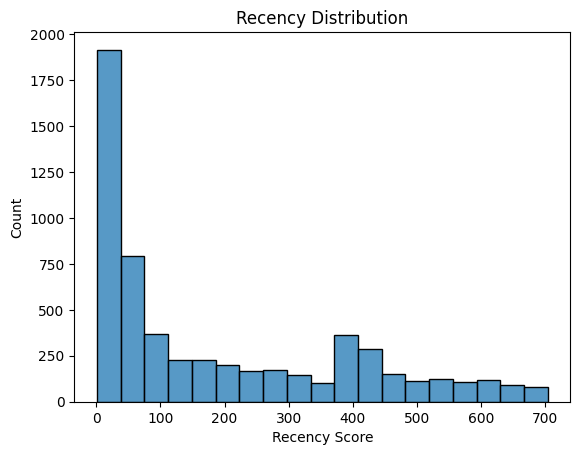

In [42]:
# Explore the distribution of RFM scores
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of the recency scores
sns.histplot(rfm['Recency'])
plt.title('Recency Distribution')
plt.xlabel('Recency Score')
plt.show()

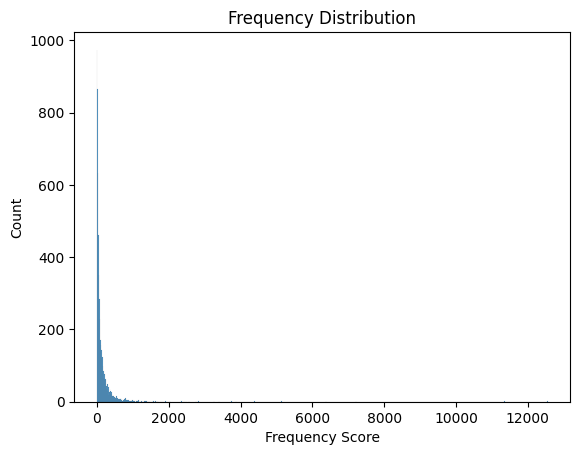

In [43]:
# Create a histogram of the frequency scores
sns.histplot(rfm['Frequency'])
plt.title('Frequency Distribution')
plt.xlabel('Frequency Score')
plt.show()

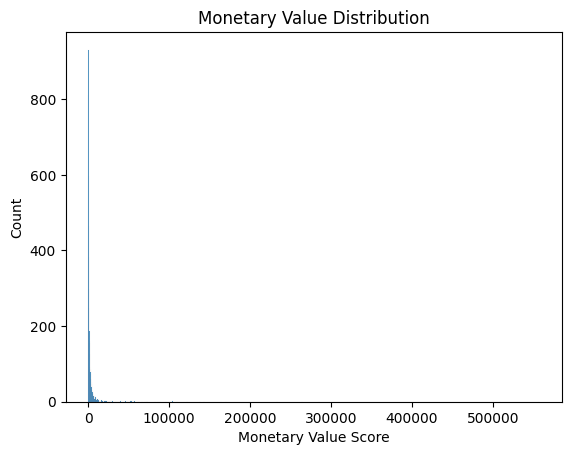

In [44]:
# Create a histogram of the monetary value scores
sns.histplot(rfm['MonetaryValue'])
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value Score')
plt.show()

Since all values in the rfm_number is positive, I would use the log transformation to make the distributions symmetric.

In [45]:
# Apply log transformation to Recency, Frequency, and MonetaryValue
rfm_log = rfm_number.apply(np.log, axis=1).round(2)

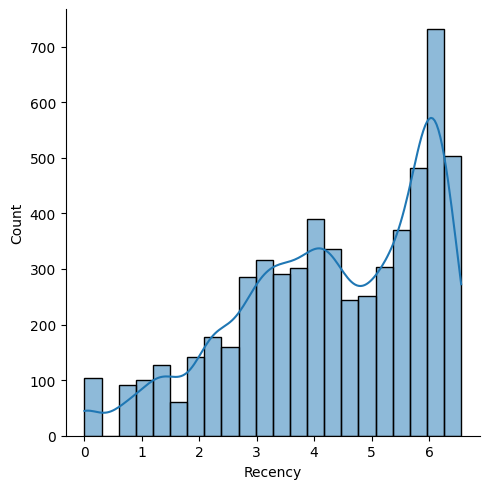

In [46]:
# Plot the distribution of RFM values
sns.displot(rfm_log['Recency'],kde=True)
plt.show()

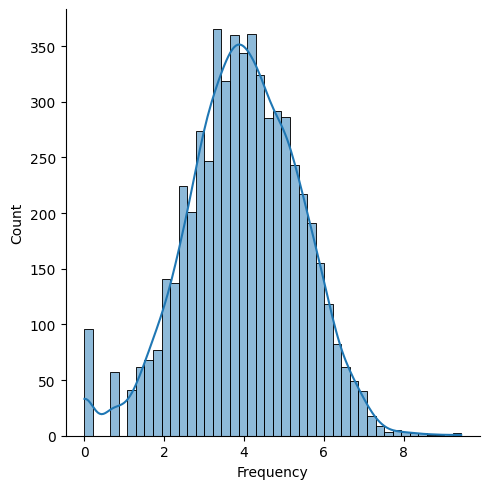

In [47]:
# Plot the distribution of RFM values
sns.displot(rfm_log['Frequency'],kde=True)
plt.show()

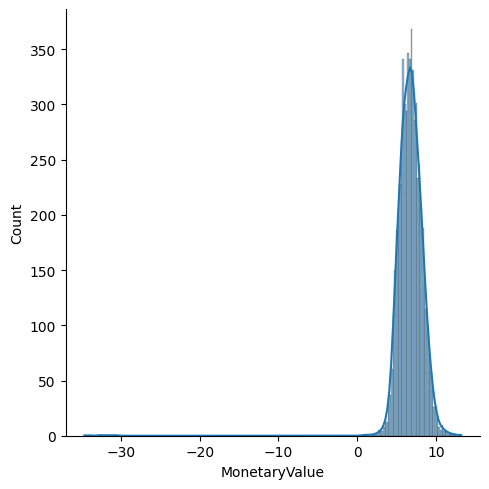

In [48]:
# Plot the distribution of RFM values
sns.displot(rfm_log['MonetaryValue'],kde=True)
plt.show()

## Implementation of K-Means Clustering

### Data pre-processing

In [49]:
rfm_log

,Recency,Frequency,MonetaryValue
Customer ID,,,
12347,0.69,5.53,8.64
12348,4.32,3.93,7.61
12349,2.94,5.16,8.40
12350,5.74,2.83,5.81
12351,5.93,3.04,5.71
...,...,...,...
18283,1.39,6.89,7.91
18284,6.06,3.37,6.08
18285,6.49,2.48,6.06


In [50]:
# Import Scikit-learn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [51]:
# Scale the RFM data using StandardScaler
scaler = StandardScaler()
rfm_log = rfm_log.replace([np.inf,-np.inf], np.nan)
rfm_log.fillna(0,inplace=True)
scaler.fit(rfm_log)
rfm_normalized = scaler.transform(rfm_log)

In [52]:
rfm_normalized

array([[-2.19836472,  1.09439926,  0.94368912],
       [-0.00467919, -0.03115962,  0.43291667],
       [-0.83864228,  0.83411377,  0.82467418],
       ...,
       [ 1.30669756, -1.05119735, -0.33572148],
       [ 1.11331481, -0.00302064, -0.07289682],
       [-0.343099  ,  0.74969686,  0.79492044]])

Log transformation can result in negative infinite values (-inf) for values of 0 in the original data. StandardScaler from scikit-learn cannot handle infinite values and therefore, we need to replace them with NaN values using the replace() method from pandas. After replacing inf and -inf values with NaN, we can then fill the NaN values with 0 using the fillna() method.

### Choosing a Number of Clusters

There are several methods to define the number of clusters for K-Means Clustering

- Elbow criterion: plot WCSS against number of clusters, choose number at elbow

- Silhouette coefficient: calculate coefficient for each data point, choose number with highest coefficient

- Experimentation and interpretation: use domain knowledge and experimentation to determine optimal number of clusters, choose number informed by external information.

 I would implement the Elbow method in this notebook. The steps to implement the elbow method are:

- Fit K-means models for a range of K values (number of clusters)

- Calculate the within-cluster sum of squares (WCSS) for each K value

- Plot the WCSS against the K values and visually identify the elbow point where the rate of decrease in WCSS slows down.

In [53]:
# Fit K-means models for K = 1 to 7 clusters
sse = {}
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_normalized)
    sse[k] = kmeans.inertia_

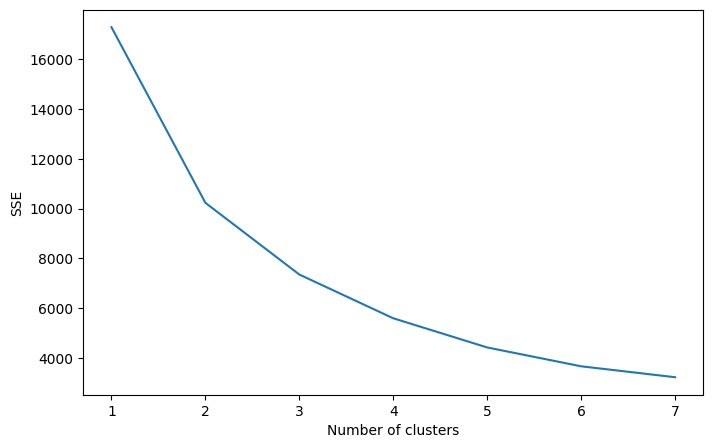

In [54]:
# Plot SSE values for each K
plt.figure(figsize=(8,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

Following the Elbow Method, I choose No.KMeans = 3

In [55]:
# Fit K-means model for 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(rfm_normalized)

# Assign cluster labels to data points
labels = kmeans.labels_

# Calculate average RFM values and sizes for each cluster
rfm_k3 = rfm_number.assign(K_Cluster = labels)
rfm_k3

,Recency,Frequency,MonetaryValue,K_Cluster
Customer ID,,,,
12347,2,253,5633.32,0
12348,75,51,2019.40,0
12349,19,175,4428.69,0
12350,310,17,334.40,1
12351,375,21,300.93,1
...,...,...,...,...
18283,4,986,2736.65,0
18284,430,29,436.68,1
18285,661,12,427.00,1


In [56]:
# Calculate average RFM values and sizes for each cluster
rfm_k3.groupby('K_Cluster').agg(
    {
        'Recency':'mean',
     'Frequency':'mean',
     'MonetaryValue':['mean','count']
    }
).round(2)

Recency Frequency MonetaryValue      
             mean      mean          mean count
K_Cluster                                      
0           43.68    268.54       5579.24  2521
1          303.27     35.48        626.07  3235
2          274.00     17.50          0.00     8

In [57]:
# Create a new DataFrame called rfm_normalized with normalized RFM scores
# Use the same index and columns as the rfm_number DataFrame
rfm_normalized = pd.DataFrame(rfm_normalized, index=rfm_number.index, columns=rfm_number.columns)

# Add a new column called K_Clusters to the rfm_normalized DataFrame
# Assign the cluster labels generated by a clustering algorithm to this column
rfm_normalized['K_Clusters'] = kmeans.labels_

# Add a new column called Grading_Segment to the rfm_normalized DataFrame
# Assign the grading segment of each customer based on their RFM scores to this column
rfm_normalized['Segment'] = rfm['Segment']

# Display the first few rows of the rfm_normalized DataFrame
rfm_normalized.head()


,Recency,Frequency,MonetaryValue,K_Clusters,Segment
Customer ID,,,,,
12347,-2.198365,1.094399,0.943689,0,Gold
12348,-0.004679,-0.031160,0.432917,0,Gold
12349,-0.838642,0.834114,0.824674,0,Gold
12350,0.853457,-0.804981,-0.459695,1,Silver
12351,0.968278,-0.657252,-0.509285,1,Bronze


In [58]:
rfm_normalized.reset_index(inplace=True)
rfm_normalized.head()

,Customer ID,Recency,Frequency,MonetaryValue,K_Clusters,Segment
0,12347,-2.198365,1.094399,0.943689,0,Gold
1,12348,-0.004679,-0.031160,0.432917,0,Gold
2,12349,-0.838642,0.834114,0.824674,0,Gold
3,12350,0.853457,-0.804981,-0.459695,1,Silver
4,12351,0.968278,-0.657252,-0.509285,1,Bronze


In [59]:
# Melt the rfm_normalized DataFrame into a long format
# Use Customer ID, Segment, and K_Clusters as identifier variables
# Use Recency, Frequency, and MonetaryValue as value variables
# Name the metric column 'Metric' and the value column 'Value'
rfm_melt = pd.melt(rfm_normalized, id_vars=['Customer ID', 'Segment', 'K_Clusters'],
                   value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                   var_name='Metric', value_name='Value')

# Display the first few rows of the resulting DataFrame
rfm_melt.head()


,Customer ID,Segment,K_Clusters,Metric,Value
0,12347,Gold,0,Recency,-2.198365
1,12348,Gold,0,Recency,-0.004679
2,12349,Gold,0,Recency,-0.838642
3,12350,Silver,1,Recency,0.853457
4,12351,Bronze,1,Recency,0.968278


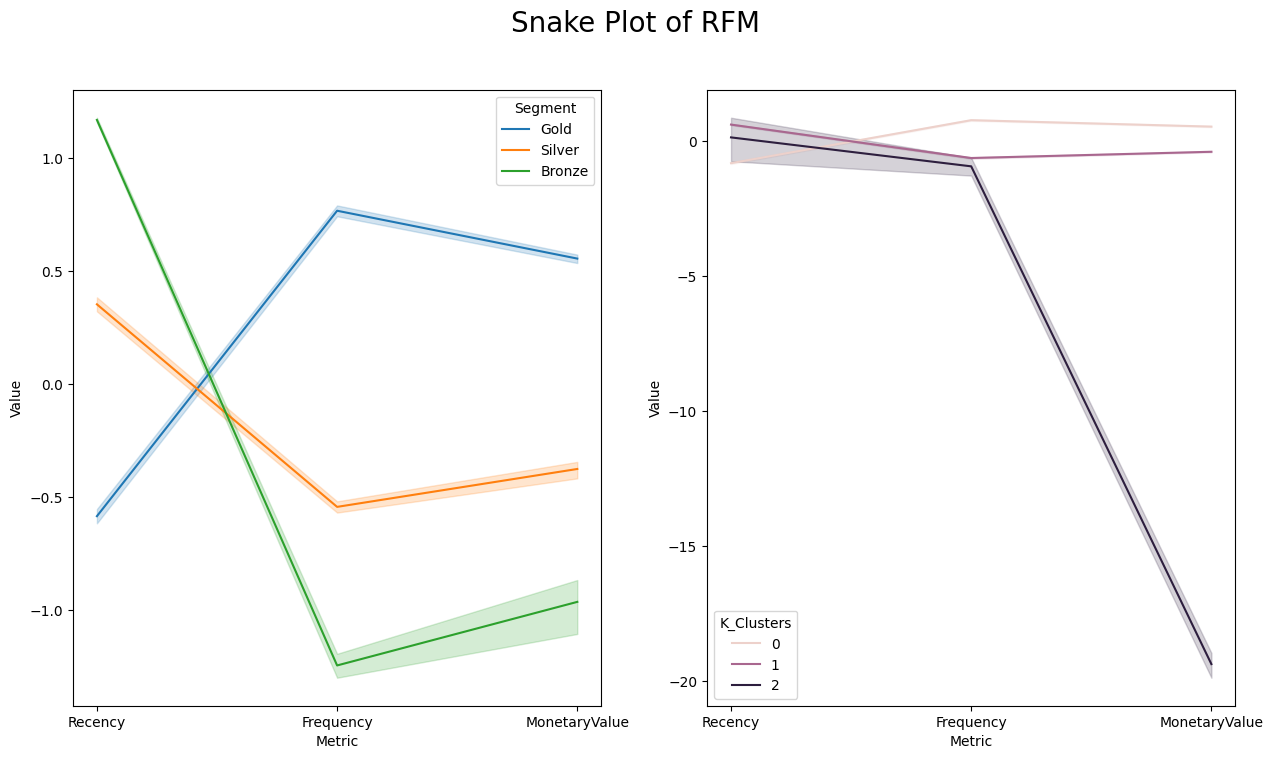

In [60]:
# Create a Snake plot for both the Segment and K_Clusters
# Create a new figure and two subplots
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
# Create a Snake plot for Segment in the first subplot
sns.lineplot(x = 'Metric', y = 'Value', hue = 'Segment', data = rfm_melt, ax = ax1)

# Create a Snake plot for K_Clusters in the second subplot
sns.lineplot(x = 'Metric', y = 'Value', hue = 'K_Clusters', data = rfm_melt, ax = ax2)

# Set the title of the figure
plt.suptitle('Snake Plot of RFM', fontsize=20)

# Show the plot
plt.show()


Notes: The snake plots for the custom segment and K-means clustering approaches show that K-means does not provide as accurate results as the custom segment does. 

I enjoyed learning about customer segmentation with K-means, and I am excited about the potential applications for this approach in my future data analysis projects.

References: 
https://www.kaggle.com/code/mahmoudelfahl/cohort-analysis-customer-segmentation-with-rfm/notebook#Implementation-of-K-Means-Clustering
Course: Customer Segmentation on DataCamp by Karolis Urbonas

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bfa1afcb-eaca-47c1-bf92-5e2ca7d05251' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>